<a href="https://colab.research.google.com/github/AtheerAlzhrani/-/blob/main/TimeSeries_Forecasting_Using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predecting the forecast for the watching hours.

- I will build a prediction model to predict the expected watch time for the next two months using Jawwy dataset which includes total watching hours for customers per day.



# install and import Dependencies

In [2]:
!pip install pyxlsb
!pip install pystan
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [15]:
# Import the required libraries
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Read the data and explore it

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/stc TV Data Set_T2 .xlsx'

In [30]:
dataframe = pd.read_excel(path,index_col=0)

In [7]:
# check the data shape
dataframe.shape

(86, 2)

In [8]:
# display the first 5 rows
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [9]:
# describe the numeric values in the dataset
dataframe.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [10]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [12]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [31]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [32]:
# show the dataframe
fig = px.line(dataframe,y="Total_watch_time_in_houres")
fig.show()

In [33]:
dataframe.tail()

,Total_watch_time_in_houres
date_,
2018-04-24,652.625278
2018-04-25,650.428889
2018-04-26,675.184444
2018-04-27,601.738056
2018-04-30,609.281667


In [37]:
# Convert the index to a column to prepare it for the model.

dataframe.reset_index(inplace=True)

In [38]:
# set columns names for the model.
dataframe.columns=['ds','y']

#Train the model

In [39]:
# make the model learn from the data.
f=Prophet(interval_width=0.95,daily_seasonality=True)
model=f.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2iq5350j/gmik0dwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2iq5350j/999heui_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81933', 'data', 'file=/tmp/tmp2iq5350j/gmik0dwv.json', 'init=/tmp/tmp2iq5350j/999heui_.json', 'output', 'file=/tmp/tmp2iq5350j/prophet_modeltwzf2sia/prophet_model-20240430191808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Make forecast

In [40]:
future=f.make_future_dataframe(periods=2,freq='M')
forecast=f.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,51.430141,734.866104,1113.182405,51.430141,51.430141,874.263339,874.263339,874.263339,821.882742,821.882742,821.882742,52.380597,52.380597,52.380597,0.0,0.0,0.0,925.693480
1,2018-01-02,49.152484,731.127490,1084.479194,49.152484,49.152484,863.628954,863.628954,863.628954,821.882742,821.882742,821.882742,41.746212,41.746212,41.746212,0.0,0.0,0.0,912.781438
2,2018-01-03,46.874827,713.871273,1071.660671,46.874827,46.874827,846.955338,846.955338,846.955338,821.882742,821.882742,821.882742,25.072596,25.072596,25.072596,0.0,0.0,0.0,893.830165
3,2018-01-04,44.597170,708.519324,1071.308478,44.597170,44.597170,850.882786,850.882786,850.882786,821.882742,821.882742,821.882742,29.000044,29.000044,29.000044,0.0,0.0,0.0,895.479956
4,2018-01-05,42.319513,735.402830,1099.040930,42.319513,42.319513,879.154000,879.154000,879.154000,821.882742,821.882742,821.882742,57.271258,57.271258,57.271258,0.0,0.0,0.0,921.473513


In [41]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
83,2018-04-26,-210.500410,456.458376,824.457142,-210.500410,-210.500410,850.882786,850.882786,850.882786,821.882742,821.882742,821.882742,29.000044,29.000044,29.000044,0.0,0.0,0.0,640.382376
84,2018-04-27,-212.778067,481.205971,844.443676,-212.778067,-212.778067,879.154000,879.154000,879.154000,821.882742,821.882742,821.882742,57.271258,57.271258,57.271258,0.0,0.0,0.0,666.375933
85,2018-04-30,-219.611038,471.575621,822.714324,-219.611038,-219.611038,874.263339,874.263339,874.263339,821.882742,821.882742,821.882742,52.380597,52.380597,52.380597,0.0,0.0,0.0,654.652301
86,2018-05-31,-290.218405,375.454965,756.722034,-290.218409,-290.218400,850.882786,850.882786,850.882786,821.882742,821.882742,821.882742,29.000044,29.000044,29.000044,0.0,0.0,0.0,560.664381
87,2018-06-30,-358.548114,181.890683,547.405088,-358.548129,-358.548101,719.147420,719.147420,719.147420,821.882742,821.882742,821.882742,-102.735321,-102.735321,-102.735321,0.0,0.0,0.0,360.599306


In [42]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,925.693480
1,2018-01-02,912.781438
2,2018-01-03,893.830165
3,2018-01-04,895.479956
4,2018-01-05,921.473513
...,...,...
83,2018-04-26,640.382376
84,2018-04-27,666.375933
85,2018-04-30,654.652301
86,2018-05-31,560.664381


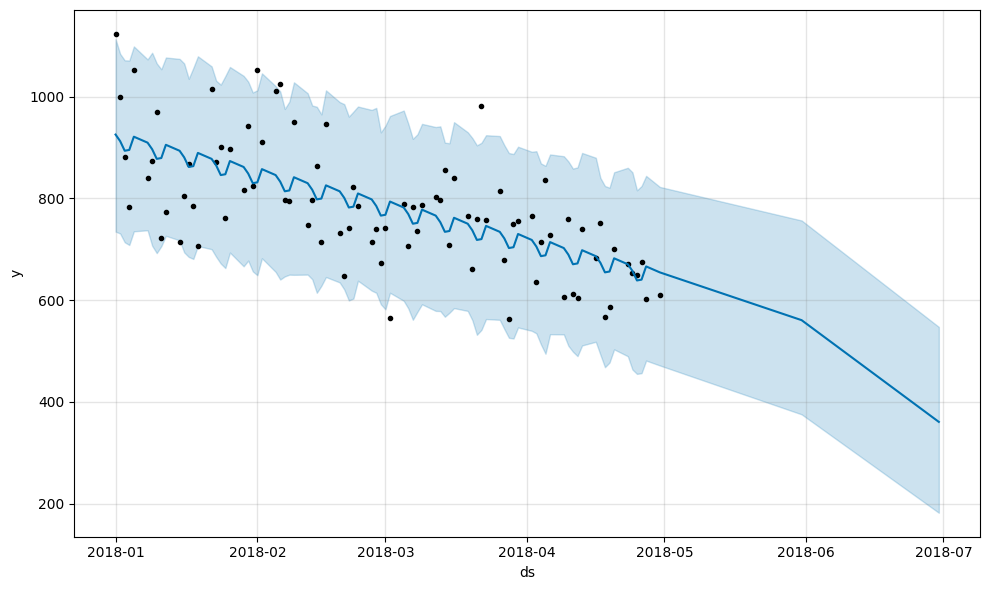

In [43]:
plot=f.plot(forecast)

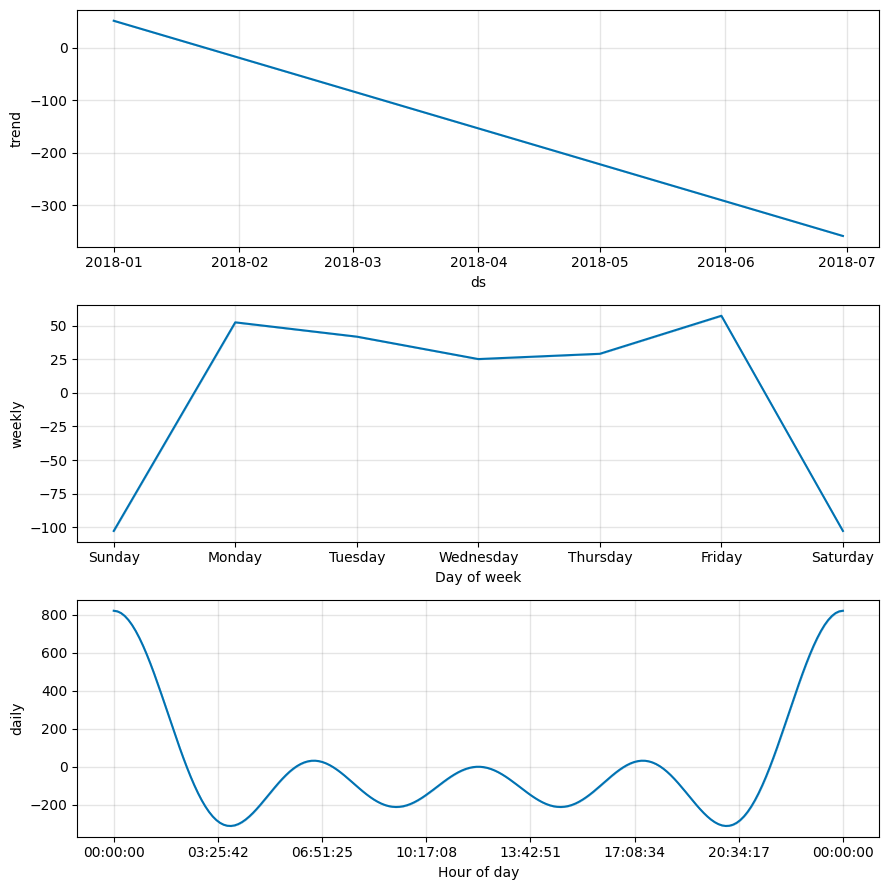

In [44]:
plot2=f.plot_components(forecast)